import to the require library's

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


load the data and explore to head of the data

In [2]:
data = pd.read_csv("/content/drive/MyDrive/INTERNSHIP/codsoft/dataset/customer churn prediction/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


drop the columns

In [3]:
data.drop(columns=['Surname','RowNumber','CustomerId'],inplace = True)
data = pd.get_dummies(data,columns = ['Geography','Gender'])

after drop the columns to explore to the head of the data

In [4]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  bool   
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
 12  Gender_Female      10000 non-null  bool   
 13  Gender_Male        10000 non-null  bool   
dtypes: bool(5), float64(2), int64(7)
memory usage: 752.1 KB


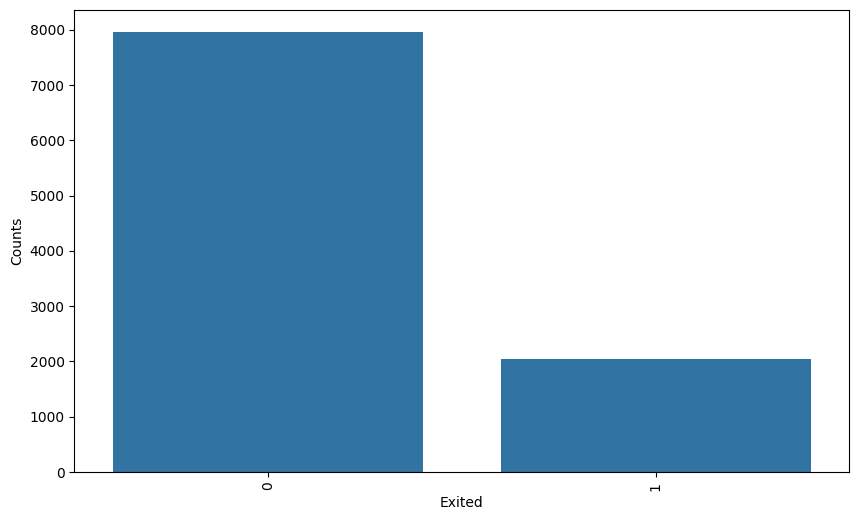

In [6]:
churn_count = data['Exited'].value_counts()
temp_df = pd.DataFrame({
    'Exited':churn_count.index,
    'Counts': churn_count.values
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Exited', y='Counts', data=temp_df)
plt.xticks(rotation=90)
plt.show()

split the data as part as the train set and test set.then get the shape of the data

In [7]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(8000, 13)
(2000, 13)


logistic regresssion

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

random forest classifier

In [9]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

gradient boost

In [10]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

prediction for logistic regression

In [11]:
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5475
[[   0  905]
 [   0 1095]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       905
        True       0.55      1.00      0.71      1095

    accuracy                           0.55      2000
   macro avg       0.27      0.50      0.35      2000
weighted avg       0.30      0.55      0.39      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


prediction for random forest

In [12]:
y_pred = rf_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[ 905    0]
 [   0 1095]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       905
        True       1.00      1.00      1.00      1095

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



prediction for gradient boosting classifier

In [13]:
y_pred = gb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[ 905    0]
 [   0 1095]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       905
        True       1.00      1.00      1.00      1095

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



save the logistic regression model by using jobib model

In [14]:
import joblib

joblib.dump(log_reg, '/content/drive/MyDrive/INTERNSHIP/codsoft/model/churn prediction/logistic_churn_model.pkl')


['/content/drive/MyDrive/INTERNSHIP/codsoft/model/churn prediction/logistic_churn_model.pkl']

save the random forest model

In [15]:
joblib.dump(rf_clf, '/content/drive/MyDrive/INTERNSHIP/codsoft/model/churn prediction/random_forest_churn_model.pkl')


['/content/drive/MyDrive/INTERNSHIP/codsoft/model/churn prediction/random_forest_churn_model.pkl']

save the gradinent boosting model

In [16]:
joblib.dump(gb_clf , '/content/drive/MyDrive/INTERNSHIP/codsoft/model/churn prediction/GB_churn_model.pkl')


['/content/drive/MyDrive/INTERNSHIP/codsoft/model/churn prediction/GB_churn_model.pkl']